In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import make_classification
x,y = make_classification(n_samples = 1000,n_classes = 2,n_clusters_per_class = 2,n_redundant = 0,n_features = 2 )

In [3]:
x

array([[-0.87251969, -2.02242818],
       [-0.93891381,  1.13760382],
       [-0.59281581, -0.17854239],
       ...,
       [-2.20335926, -0.46884481],
       [-0.04070272,  2.26512516],
       [ 2.00411772, -0.38265061]])

In [4]:
y

array([0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,

In [5]:
pd.DataFrame(x)

,0,1
0,-0.872520,-2.022428
1,-0.938914,1.137604
2,-0.592816,-0.178542
3,1.519473,0.430911
4,1.153351,-1.201256
...,...,...
995,0.864806,0.429615
996,2.245554,-2.392024
997,-2.203359,-0.468845
998,-0.040703,2.265125


In [6]:
pd.DataFrame(x)[1]

0     -2.022428
1      1.137604
2     -0.178542
3      0.430911
4     -1.201256
         ...   
995    0.429615
996   -2.392024
997   -0.468845
998    2.265125
999   -0.382651
Name: 1, Length: 1000, dtype: float64

In [7]:
pd.DataFrame(x)[0]

0     -0.872520
1     -0.938914
2     -0.592816
3      1.519473
4      1.153351
         ...   
995    0.864806
996    2.245554
997   -2.203359
998   -0.040703
999    2.004118
Name: 0, Length: 1000, dtype: float64

<Axes: xlabel='0', ylabel='1'>

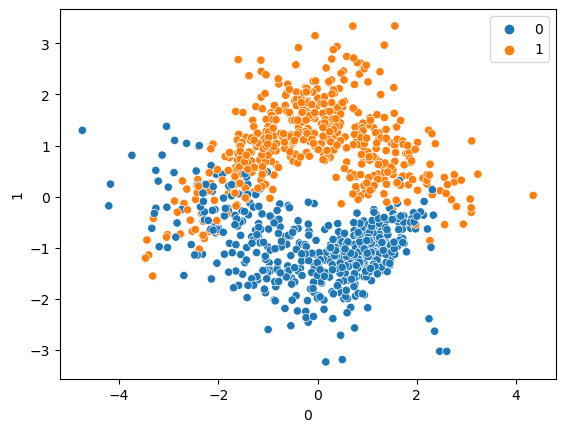

In [8]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue = y)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [10]:
from sklearn.svm import SVC
clf=SVC(kernel = "linear")

In [11]:
clf.fit(x_train,y_train)

SVC(kernel='linear')

In [12]:
clf.coef_

array([[0.13344281, 2.21899349]])

In [13]:
 from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [14]:
y_pred=clf.predict(x_test)

In [15]:
confusion_matrix(y_pred,y_test)

array([[109,  14],
       [  8, 119]], dtype=int64)

In [16]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       123
           1       0.89      0.94      0.92       127

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250



In [17]:
accuracy_score(y_pred,y_test)

0.912

In [18]:
#hyperparameter tuning. with svc
from sklearn.model_selection import  GridSearchCV
params = {'C' :[1,2,3,50,100,300],
          'gamma':[1,0.1,0.2,0.001,0.003],
          'kernel':['linear']
         }
grid = GridSearchCV(SVC(),param_grid = params,cv=5,verbose = 3)

In [19]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END .......C=1, gamma=1, kernel=linear;, score=0.940 total time=   0.0s
[CV 2/5] END .......C=1, gamma=1, kernel=linear;, score=0.920 total time=   0.0s
[CV 3/5] END .......C=1, gamma=1, kernel=linear;, score=0.887 total time=   0.0s
[CV 4/5] END .......C=1, gamma=1, kernel=linear;, score=0.920 total time=   0.0s
[CV 5/5] END .......C=1, gamma=1, kernel=linear;, score=0.953 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.940 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.920 total time=   0.0s
[CV 3/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.887 total time=   0.0s
[CV 4/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.920 total time=   0.0s
[CV 5/5] END .....C=1, gamma=0.1, kernel=linear;, score=0.953 total time=   0.0s
[CV 1/5] END .....C=1, gamma=0.2, kernel=linear;, score=0.940 total time=   0.0s
[CV 2/5] END .....C=1, gamma=0.2, kernel=linear

[CV 2/5] END .....C=100, gamma=1, kernel=linear;, score=0.920 total time=   0.0s
[CV 3/5] END .....C=100, gamma=1, kernel=linear;, score=0.887 total time=   0.0s
[CV 4/5] END .....C=100, gamma=1, kernel=linear;, score=0.920 total time=   0.0s
[CV 5/5] END .....C=100, gamma=1, kernel=linear;, score=0.953 total time=   0.0s
[CV 1/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.940 total time=   0.0s
[CV 2/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.920 total time=   0.0s
[CV 3/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.887 total time=   0.0s
[CV 4/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.920 total time=   0.0s
[CV 5/5] END ...C=100, gamma=0.1, kernel=linear;, score=0.953 total time=   0.0s
[CV 1/5] END ...C=100, gamma=0.2, kernel=linear;, score=0.940 total time=   0.0s
[CV 2/5] END ...C=100, gamma=0.2, kernel=linear;, score=0.920 total time=   0.0s
[CV 3/5] END ...C=100, gamma=0.2, kernel=linear;, score=0.887 total time=   0.0s
[CV 4/5] END ...C=100, gamma

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 2, 3, 50, 100, 300],
                         'gamma': [1, 0.1, 0.2, 0.001, 0.003],
                         'kernel': ['linear']},
             verbose=3)

In [20]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [21]:
grid.best_score_

0.924

In [22]:
grid.predict(x_test)

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1])

In [23]:
y_pred = grid.predict(x_test)

In [24]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       123
           1       0.89      0.94      0.92       127

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250



In [25]:
accuracy_score(y_pred,y_test)

0.912